## Importing the libraries

In [2]:
import os
import numpy as np
import pandas as pd
#import matplotlib
#matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

## Reading in the data files

In [3]:
df_listings = pd.read_csv('Data/listings.csv', dtype='str')

## Data Exploration

### Listings Dataframe

In [4]:
df_listings.shape

(86358, 106)

In [5]:
pd.set_option('display.max_columns', None)

# show listings data sample
df_listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,20200414180850,2020-04-16,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,"Hello Everyone, I'm offering my lovely double ...",My bright double bedroom with a large window h...,business,Finsbury Park is a friendly melting pot commun...,For art lovers I can give guest my Tate Member...,The flat only a 10 minute walk to Finsbury Par...,Guest will have access to the self catering ki...,I like to have little chats with my guest over...,I'm an artist and have my artwork up on the wa...,NaN,NaN,https://a0.muscache.com/im/pictures/ffb507b7-9...,NaN,54730,https://www.airbnb.com/users/show/54730,Alina,2009-11-16,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,71%,89%,f,https://a0.muscache.com/im/users/54730/profile...,https://a0.muscache.com/im/users/54730/profile...,LB of Islington,4,4,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Islington, Greater London, United Kingdom",LB of Islington,Islington,NaN,Islington,Greater London,N4 3,London,"Islington, United Kingdom",GB,United Kingdom,51.56802,-0.11121,t,Apartment,Private room,2,1.0,1,0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",538,$65.00,$333.00,"$1,176.00",$100.00,$15.00,1,$15.00,1,29,1,1,29,29,1.0,29.0,12 months ago,t,27,57,84,359,2020-04-16,21,7,2010-08-18,2020-02-22,97,10,10,10,10,9,9,f,NaN,NaN,f,f,moderate,f,f,2,1,1,0,0.18
1,15400,https://www.airbnb.com/rooms/15400,20200414180850,2020-04-16,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,Bright Chelsea Apartment This is a bright one...,Lots of windows and light. St Luke's Gardens ...,romantic,It is Chelsea.,The building next door is in the process of be...,The underground stations are South Kensington ...,There are two wardrobes for guests exclusive u...,If I am in the country I like to welcome my gu...,NO SMOKING PLEASE.. No unauthorised guests. No...,NaN,NaN,https://a0.muscache.com/im/pictures/428392/462...,NaN,60302,https://www.airbnb.com/users/show/60302,Philippa,2009-12-05,"Kensington, England, United Kingdom","English, grandmother, I have travelled quite ...",within a day,50%,67%,f,https://a0.muscache.com/im/users/60302/

In [6]:
set(df_listings.columns[df_listings.isnull().mean()>0.75])

{'jurisdiction_names',
 'license',
 'medium_url',
 'monthly_price',
 'neighbourhood_group_cleansed',
 'square_feet',
 'thumbnail_url',
 'weekly_price',
 'xl_picture_url'}

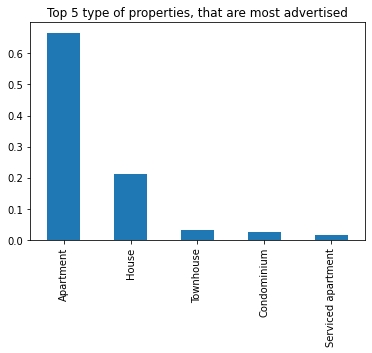

In [7]:
neighbourhood_vals = df_listings['property_type'].value_counts()

# The below should be a bar chart of the proportion of individuals in each professional category if your status_vals
# is set up correctly.

(neighbourhood_vals[0:5]/df_listings.shape[0]).plot(kind="bar");
plt.title("Top 5 type of properties, that are most advertised");

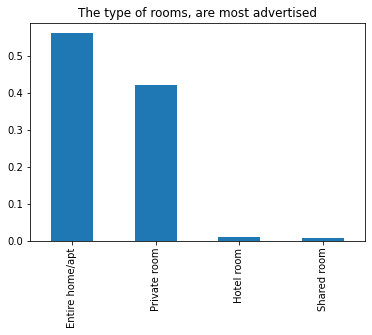

In [8]:
room_vals = df_listings['room_type'].value_counts()

# The below should be a bar chart of the proportion of individuals in each professional category if your status_vals
# is set up correctly.

(room_vals/df_listings.shape[0]).plot(kind="bar");
plt.title("The type of rooms, are most advertised");

## The Business Questions

### What are Airbnb current challanges?

### Question 1
- What is the average price of the listings, for the different location within London?

In [9]:
price_df = df_listings[df_listings['price'].isnull() == False]

In [10]:
price_df.shape

(86358, 106)

In [11]:
price_df['neighbourhood_cleansed'].value_counts()

Westminster               9943
Tower Hamlets             8321
Camden                    6243
Hackney                   6210
Kensington and Chelsea    6079
Islington                 5019
Southwark                 4957
Lambeth                   4881
Wandsworth                4261
Hammersmith and Fulham    4233
Brent                     2605
Lewisham                  2326
Haringey                  2233
Newham                    2071
Ealing                    1790
Greenwich                 1736
Barnet                    1670
Waltham Forest            1476
Merton                    1364
Richmond upon Thames      1217
Hounslow                  1105
Croydon                   1091
Redbridge                  752
Enfield                    710
Hillingdon                 666
Bromley                    654
Kingston upon Thames       550
City of London             491
Harrow                     473
Barking and Dagenham       396
Sutton                     318
Bexley                     261
Havering

In [12]:
price_df['price'] = price_df['price'].str.replace('$', '', regex=True)
price_df['price'] = price_df['price'].str.replace(',', '', regex=True)
price_df['price'] = price_df['price'].astype(float)

In [13]:
nb_price_avg = price_df.groupby('neighbourhood_cleansed', as_index=False).mean()
nb_price_avg = pd.DataFrame(nb_price_avg).sort_values(by='price', ascending=False)

In [14]:
nb_price_avg = nb_price_avg.rename(columns={'neighbourhood_cleansed':'Neighbourhood','price': 'Avg Price'})

[Text(0, 0, 'Westminster'),
 Text(0, 0, 'Kensington and Chelsea'),
 Text(0, 0, 'City of London'),
 Text(0, 0, 'Camden'),
 Text(0, 0, 'Hammersmith and Fulham'),
 Text(0, 0, 'Richmond upon Thames'),
 Text(0, 0, 'Wandsworth'),
 Text(0, 0, 'Southwark'),
 Text(0, 0, 'Islington'),
 Text(0, 0, 'Merton'),
 Text(0, 0, 'Hounslow'),
 Text(0, 0, 'Brent'),
 Text(0, 0, 'Lambeth'),
 Text(0, 0, 'Tower Hamlets'),
 Text(0, 0, 'Hackney'),
 Text(0, 0, 'Barnet'),
 Text(0, 0, 'Haringey'),
 Text(0, 0, 'Greenwich'),
 Text(0, 0, 'Ealing'),
 Text(0, 0, 'Sutton'),
 Text(0, 0, 'Newham'),
 Text(0, 0, 'Kingston upon Thames'),
 Text(0, 0, 'Harrow'),
 Text(0, 0, 'Waltham Forest'),
 Text(0, 0, 'Redbridge'),
 Text(0, 0, 'Lewisham'),
 Text(0, 0, 'Hillingdon'),
 Text(0, 0, 'Havering'),
 Text(0, 0, 'Enfield'),
 Text(0, 0, 'Bromley'),
 Text(0, 0, 'Barking and Dagenham'),
 Text(0, 0, 'Croydon'),
 Text(0, 0, 'Bexley')]

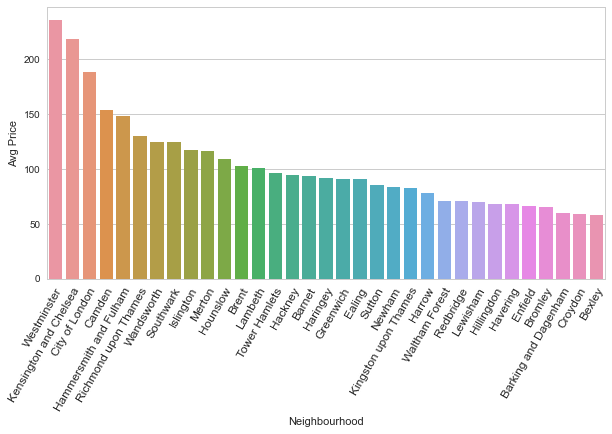

In [15]:
plt.figure(figsize=(10,5))

sns.set(style="whitegrid")
chart = sns.barplot(x="Neighbourhood", y="Avg Price", data=nb_price_avg)

chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=60, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium', 
    rotation_mode='anchor'
)

### Question 2

- What types of verifications are hosts using? How long did it take them to respond?

In [16]:
verifications_df = df_listings[df_listings['host_verifications'].isnull() == False]

In [17]:
verifications_df.shape

(86358, 106)

In [18]:
verifications_df = verifications_df[verifications_df['host_verifications'] != '[]']

In [19]:
verifications_df.shape

(86272, 106)

In [20]:
verifications_df['host_verifications'].value_counts()

['email', 'phone', 'reviews', 'jumio', 'government_id']                                                                   9206
['email', 'phone']                                                                                                        8562
['email', 'phone', 'reviews', 'jumio', 'offline_government_id', 'selfie', 'government_id', 'identity_manual']             6470
['email', 'phone', 'reviews']                                                                                             5497
['email', 'phone', 'offline_government_id', 'selfie', 'government_id', 'identity_manual']                                 4872
                                                                                                                          ... 
['email', 'phone', 'reviews', 'manual_offline', 'jumio', 'work_email']                                                       1
['phone', 'jumio', 'offline_government_id', 'government_id', 'identity_manual']                                

In [21]:
def verifications_types(column):
    verifications_dict = {}
    temp = []

    for i in column:
        temp.append(eval(i))
    
    for i in temp:
        try:
            for j in i:
                if j not in verifications_dict:
                    verifications_dict[j] = 1
                else:
                    verifications_dict[j] += 1
        except:
            continue
            
    return verifications_dict
        
verifications_types = verifications_types(verifications_df['host_verifications'])

In [22]:
verifications_types

{'email': 79397,
 'phone': 85821,
 'facebook': 14257,
 'reviews': 55107,
 'offline_government_id': 42144,
 'selfie': 29315,
 'government_id': 64097,
 'jumio': 49014,
 'identity_manual': 27303,
 'work_email': 13213,
 'kba': 403,
 'manual_offline': 1614,
 'manual_online': 739,
 'google': 4121,
 'sent_id': 94,
 'photographer': 2,
 'weibo': 46,
 'sesame': 19,
 'sesame_offline': 19,
 'zhima_selfie': 32}

In [23]:
for k,v in verifications_types.items():
    verifications_types[k] = round(v / verifications_df.shape[0] * 100, 3)

In [24]:
verifications_types

{'email': 92.031,
 'phone': 99.477,
 'facebook': 16.526,
 'reviews': 63.876,
 'offline_government_id': 48.85,
 'selfie': 33.98,
 'government_id': 74.296,
 'jumio': 56.813,
 'identity_manual': 31.648,
 'work_email': 15.316,
 'kba': 0.467,
 'manual_offline': 1.871,
 'manual_online': 0.857,
 'google': 4.777,
 'sent_id': 0.109,
 'photographer': 0.002,
 'weibo': 0.053,
 'sesame': 0.022,
 'sesame_offline': 0.022,
 'zhima_selfie': 0.037}

In [25]:
verifications_types = pd.DataFrame.from_dict(verifications_types,orient='index',columns=['A']).reset_index()
verifications_types = verifications_types.rename(columns={'index':'Verification Type','A': '% of listings'})
verifications_types = verifications_types.sort_values(by='% of listings', ascending=False)

In [26]:
verifications_types

,Verification Type,% of listings
1,phone,99.477
0,email,92.031
6,government_id,74.296
3,reviews,63.876
7,jumio,56.813
4,offline_government_id,48.850
5,selfie,33.980
8,identity_manual,31.648
2,facebook,16.526
9,work_email,15.316


[Text(0, 0, 'phone'),
 Text(0, 0, 'email'),
 Text(0, 0, 'government_id'),
 Text(0, 0, 'reviews'),
 Text(0, 0, 'jumio'),
 Text(0, 0, 'offline_government_id'),
 Text(0, 0, 'selfie'),
 Text(0, 0, 'identity_manual'),
 Text(0, 0, 'facebook'),
 Text(0, 0, 'work_email'),
 Text(0, 0, 'google'),
 Text(0, 0, 'manual_offline'),
 Text(0, 0, 'manual_online'),
 Text(0, 0, 'kba'),
 Text(0, 0, 'sent_id'),
 Text(0, 0, 'weibo'),
 Text(0, 0, 'zhima_selfie'),
 Text(0, 0, 'sesame'),
 Text(0, 0, 'sesame_offline'),
 Text(0, 0, 'photographer')]

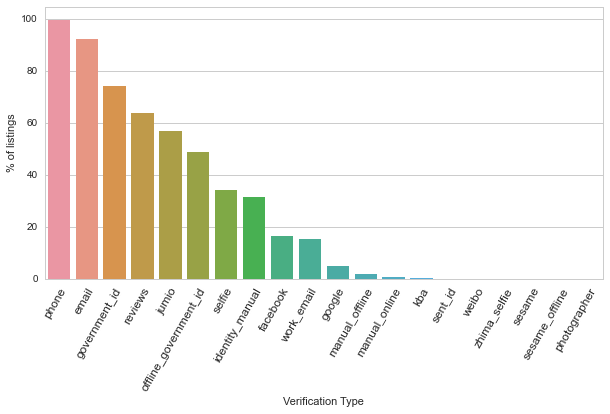

In [27]:
plt.figure(figsize=(10,5))

sns.set(style="whitegrid")
chart = sns.barplot(x="Verification Type", y="% of listings", data=verifications_types)

chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=60, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium', 
    rotation_mode='anchor'
)

### Question 3
- What features assist in obtaining a good review score? 
    - Could the score be predicted?
    - importance of the features, rank features

#### The Data Preparation

In [43]:
df_listings.head(3)

,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,calendar_updated,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,"Hello Everyone, I'm offering my lovely double ...",My bright double bedroom with a large window h...,business,Finsbury Park is a friendly melting pot commun...,For art lovers I can give guest my Tate Member...,The flat only a 10 minute walk to Finsbury Par...,Guest will have access to the self catering ki...,I like to have little chats with my guest over...,I'm an artist and have my artwork up on the wa...,Alina,2009-11-16,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,71%,89%,f,LB of Islington,4,4,"['email', 'phone', 'facebook', 'reviews', 'off...",t,"Islington, Greater London, United Kingdom",LB of Islington,Islington,NaN,Islington,Greater London,N4 3,London,"Islington, United Kingdom",GB,United Kingdom,51.56802,-0.11121,t,Apartment,Private room,2,1.0,1,0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",$65.00,$100.00,$15.00,1,$15.00,12 months ago,21,7,2010-08-18,2020-02-22,97,10,10,10,10,9,9,f,f,moderate,f,f,0.18
1,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,Bright Chelsea Apartment This is a bright one...,Lots of windows and light. St Luke's Gardens ...,romantic,It is Chelsea.,The building next door is in the process of be...,The underground stations are South Kensington ...,There are two wardrobes for guests exclusive u...,If I am in the country I like to welcome my gu...,NO SMOKING PLEASE.. No unauthorised guests. No...,Philippa,2009-12-05,"Kensington, England, United Kingdom","English, grandmother, I have travelled quite ...",within a day,50%,67%,f,Chelsea,1,1,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,"London, United Kingdom",Chelsea,Kensington and Chelsea,NaN,London,NaN,SW3,London,"London, United Kingdom",GB,United Kingdom,51.48796,-0.16898,t,Apartment,Entire home/apt,2,1.0,1,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$100.00,$150.00,$50.00,2,$0.00,3 months ago,89,6,2009-12-21,2020-03-16,96,10,10,10,10,10,9,t,f,strict_14_with_grace_period,t,t,0.71
2,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"This is a wonderful very popular beautiful, sp...",You'll have a wonderful stay in this superb mo...,none,"Location, location, location! You won't find b...",This property has new flooring throughout. Gue...,You can walk to tourist London or take numerou...,Full use of whole independent apartment,"Always available by email or phone (before, du...",* The apartment benefits from new flooring thr...,Liz,2010-01-04,"London, England, United Kingdom",We are Liz and Jack. We manage a number of ho...,within an hour,80%,94%,f,Fitzrovia,18,18,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,"London, Fitzrovia, United Kingdom",Fitzrovia,Westminster,NaN,London,Fitzrovia,W1T4BP,London,"London, United Kingdom",GB,United Kingdom,51.52

In [44]:
#df = df_listings[["property_type","room_type","bed_type","accommodates","bathrooms",
#             "bedrooms","beds","price","security_deposit",
#             "cleaning_fee","review_scores_rating"]]

df = df_listings[["property_type","room_type","bed_type","accommodates","bathrooms",
             "bedrooms","beds","review_scores_rating"]]

#"amenities"

In [45]:
df.head()

,property_type,room_type,bed_type,accommodates,bathrooms,bedrooms,beds,review_scores_rating
0,Apartment,Private room,Real Bed,2,1.0,1,0,97
1,Apartment,Entire home/apt,Real Bed,2,1.0,1,1,96
2,Apartment,Entire home/apt,Real Bed,6,2.0,3,3,94
3,Bed and breakfast,Private room,Real Bed,2,1.0,1,1,NaN
4,Apartment,Entire home/apt,Real Bed,4,1.0,2,2,93


In [46]:
df.describe()

,property_type,room_type,bed_type,accommodates,bathrooms,bedrooms,beds,review_scores_rating
count,86358,86358,86355,86358,86226,86216,85416,63201
unique,41,4,5,18,26,17,25,60
top,Apartment,Entire home/apt,Real Bed,2,1.0,1,1,100
freq,57529,48550,85755,36064,58800,54004,45357,17897


In [47]:
df.dtypes

property_type           object
room_type               object
bed_type                object
accommodates            object
bathrooms               object
bedrooms                object
beds                    object
review_scores_rating    object
dtype: object

In [48]:
df = df.dropna(subset=["review_scores_rating"])

In [49]:
df.shape

(63201, 8)

In [50]:
def data_float(column):
    column = column.str.replace('$', '', regex=True)
    column = column.str.replace(',', '', regex=True)
    column = column.astype(float)
    
    return column
    
df['bathrooms'] = data_float(df['bathrooms'])
df['beds'] = data_float(df['beds'])
df['bedrooms'] = data_float(df['bedrooms'])

In [51]:
def data_int(column):
    column = column.astype('int64')
    
    return column
    
df['accommodates'] = data_int(df['accommodates'])
df['review_scores_rating'] = data_int(df['review_scores_rating'])

In [52]:
df['property_type'] = pd.Categorical(df.property_type)
df['property_type'] = df.property_type.cat.codes

In [53]:
df['room_type'] = pd.Categorical(df.room_type)
df['room_type'] = df.room_type.cat.codes

In [54]:
df['bed_type'] = pd.Categorical(df.bed_type)
df['bed_type'] = df.bed_type.cat.codes

In [55]:
df.dtypes

property_type              int8
room_type                  int8
bed_type                   int8
accommodates              int64
bathrooms               float64
bedrooms                float64
beds                    float64
review_scores_rating      int64
dtype: object

In [56]:
df.head()

,property_type,room_type,bed_type,accommodates,bathrooms,bedrooms,beds,review_scores_rating
0,1,2,4,2,1.0,1.0,0.0,97
1,1,0,4,2,1.0,1.0,1.0,96
2,1,0,4,6,2.0,3.0,3.0,94
4,1,0,4,4,1.0,2.0,2.0,93
5,20,2,4,2,1.5,1.0,0.0,96


In [57]:
df.isnull().sum()

property_type             0
room_type                 0
bed_type                  0
accommodates              0
bathrooms                32
bedrooms                 51
beds                    216
review_scores_rating      0
dtype: int64

In [58]:
df = df.dropna(subset=['beds'])
df = df.dropna(subset=['bedrooms'])
df = df.dropna(subset=['bathrooms'])

In [59]:
df.isnull().sum()

property_type           0
room_type               0
bed_type                0
accommodates            0
bathrooms               0
bedrooms                0
beds                    0
review_scores_rating    0
dtype: int64

In [60]:
df.shape

(62918, 8)

In [61]:
df.head()

,property_type,room_type,bed_type,accommodates,bathrooms,bedrooms,beds,review_scores_rating
0,1,2,4,2,1.0,1.0,0.0,97
1,1,0,4,2,1.0,1.0,1.0,96
2,1,0,4,6,2.0,3.0,3.0,94
4,1,0,4,4,1.0,2.0,2.0,93
5,20,2,4,2,1.5,1.0,0.0,96


In [62]:
rating_scores = df['review_scores_rating'].value_counts()

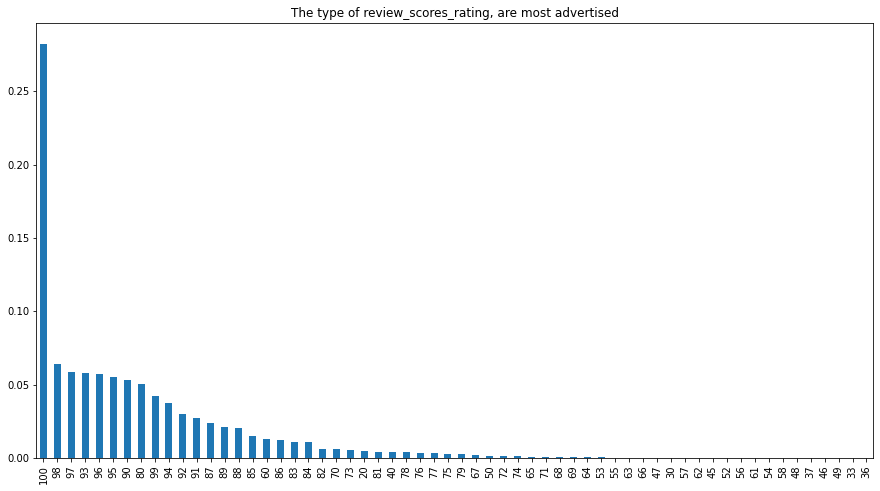

In [63]:
plt.figure(figsize=(15,8))

(rating_scores/df.shape[0]).plot(kind="bar");
plt.title("The type of review_scores_rating, are most advertised");

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a25b217f0>,
      dtype=object)

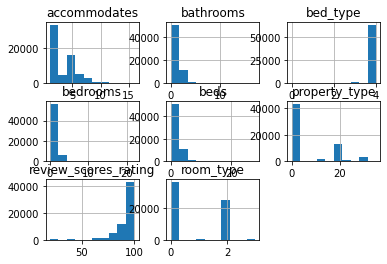

In [64]:
df.hist()

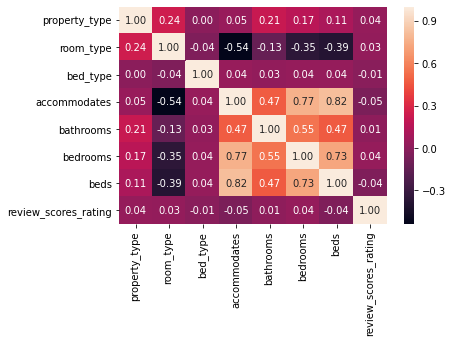

In [65]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");

In [66]:
#x = df[["property_type","room_type","bed_type","accommodates","bathrooms",
   #          "bedrooms","beds","price","security_deposit",
    #         "cleaning_fee"]]
X = df.iloc[:,:-1]
y = df['review_scores_rating']

In [67]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline

In [69]:
pipeline = Pipeline([
    ('clf', LinearRegression(normalize=True))
])

In [70]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('clf',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=True))],
         verbose=False)

In [71]:
# predict on test data
y_pred = pipeline.predict(X_test)

In [73]:
#Predict and score the model
y_test_preds = pipeline.predict(X_test) 
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was 0.018239573083934535 on 12584 values.'